# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Proyecto Sprint 11 #

En este proyecto, trabajaremos para la compañía OilyGiant con el objetivo de identificar la región óptima para desarrollar 200 nuevos pozos petroleros. Se cuenta con tres conjuntos de datos (geo_data_0.csv, geo_data_1.csv, geo_data_2.csv) que contienen características relevantes de cada pozo (f0, f1, f2) y el volumen de reservas (expresado en miles de barriles). La meta es construir un modelo de regresión lineal que, a partir de estas características, prediga el volumen de reservas de nuevos pozos, permitiendo seleccionar los 200 pozos con las mayores predicciones. Además, se incorporarán técnicas de validación cruzada, bootstrapping para el análisis del riesgo y cálculos de métricas de negocio (como ingreso, inversión y punto de equilibrio), con el fin de obtener conclusiones sólidas sobre la rentabilidad potencial y el riesgo de pérdidas en cada región.

El desarrollo del proyecto se llevará a cabo de forma modular y progresiva. Inicialmente, se realizará la carga y preprocesamiento de los datos, asegurando su calidad y evitando posibles fugas de información. Posteriormente, se dividirán los datos en conjuntos de entrenamiento y validación, y se entrenará el modelo de regresión lineal, evaluándolo mediante métricas como el RMSE y el volumen medio de reservas predicho. A continuación, se seleccionarán los 200 pozos con las predicciones más altas y se calculará la ganancia potencial, considerando variables de negocio. Finalmente, se aplicará la técnica de bootstrapping para obtener intervalos de confianza y evaluar el riesgo de pérdidas, permitiendo tomar decisiones fundamentadas en la comparación de beneficios y riesgos entre las regiones.

In [12]:
# Importación de librerías para manipulación de datos, modelado y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de funciones para la división de datos, validación cruzada y modelado
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Librerías para el análisis estadístico, cálculo de intervalos de confianza y bootstrapping
from scipy import stats as st
from numpy.random import RandomState

In [13]:
# Importar los conjuntos de datos
data0 = pd.read_csv('geo_data_0.csv')
data1 = pd.read_csv('geo_data_1.csv')
data2 = pd.read_csv('geo_data_2.csv')

# Crear una función para mostrar las características básicas de cada dataset


def mostrar_caracteristicas(data, nombre):
    print(f"Características de {nombre}:")
    print("Dimensiones:", data.shape)
    print("Columnas:", data.columns.tolist())
    print("Primeras filas:")
    display(data.head())
    print("-" * 50)


# Mostrar las características de cada archivo
mostrar_caracteristicas(data0, "geo_data_0.csv")
mostrar_caracteristicas(data1, "geo_data_1.csv")
mostrar_caracteristicas(data2, "geo_data_2.csv")

Características de geo_data_0.csv:
Dimensiones: (100000, 5)
Columnas: ['id', 'f0', 'f1', 'f2', 'product']
Primeras filas:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


--------------------------------------------------
Características de geo_data_1.csv:
Dimensiones: (100000, 5)
Columnas: ['id', 'f0', 'f1', 'f2', 'product']
Primeras filas:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


--------------------------------------------------
Características de geo_data_2.csv:
Dimensiones: (100000, 5)
Columnas: ['id', 'f0', 'f1', 'f2', 'product']
Primeras filas:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


--------------------------------------------------


Los tres conjuntos de datos (geo_data_0.csv, geo_data_1.csv y geo_data_2.csv) tienen dimensiones de 100,000 filas y 5 columnas, que incluyen un identificador único (`id`), tres características numéricas (`f0`, `f1`, `f2`) y el volumen de reservas en cada pozo (`product`). Los datos no presentan valores nulos, lo que indica que están completos y listos para ser utilizados en el modelo. Las columnas `f0`, `f1`, `f2` y `product` están en formato numérico (float64), mientras que la columna `id` tiene formato de texto (object). Esto sugiere que los datos están bien estructurados y no requieren tratamiento adicional en términos de valores nulos o conversiones de tipo de datos antes del análisis. 

In [14]:
# Función para preprocesar los datos de cada dataset
def preprocesar_datos(data, nombre):
    print(f"Preprocesando {nombre}...")

    # Mostrar la cantidad de valores nulos en cada columna
    print("Valores nulos por columna:")
    print(data.isnull().sum())

    # Mostrar tipos de datos
    print("\nTipos de datos:")
    print(data.dtypes)

    # En este ejemplo, asumimos que los datos son consistentes y no requieren imputación.
    # Si fuera necesario, aquí se podría agregar código para tratar valores nulos o ajustar tipos de datos.

    print("-" * 50, "\n")
    return data


# Preprocesar cada uno de los conjuntos de datos
data0_clean = preprocesar_datos(data0, "geo_data_0.csv")
data1_clean = preprocesar_datos(data1, "geo_data_1.csv")
data2_clean = preprocesar_datos(data2, "geo_data_2.csv")

Preprocesando geo_data_0.csv...
Valores nulos por columna:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Tipos de datos:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
-------------------------------------------------- 

Preprocesando geo_data_1.csv...
Valores nulos por columna:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Tipos de datos:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
-------------------------------------------------- 

Preprocesando geo_data_2.csv...
Valores nulos por columna:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Tipos de datos:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
-------------------------------------------------- 



Los tres conjuntos de datos presentan una estructura idéntica con 100,000 filas y 5 columnas cada uno: 'id', 'f0', 'f1', 'f2' y 'product'. En las primeras filas se observan valores que varían significativamente en las características numéricas y en el volumen de reservas ('product'). El preprocesamiento confirma la integridad de los datos, ya que no se detectaron valores nulos y las variables están tipificadas correctamente, con 'id' como objeto y las demás columnas como números de punto flotante. 

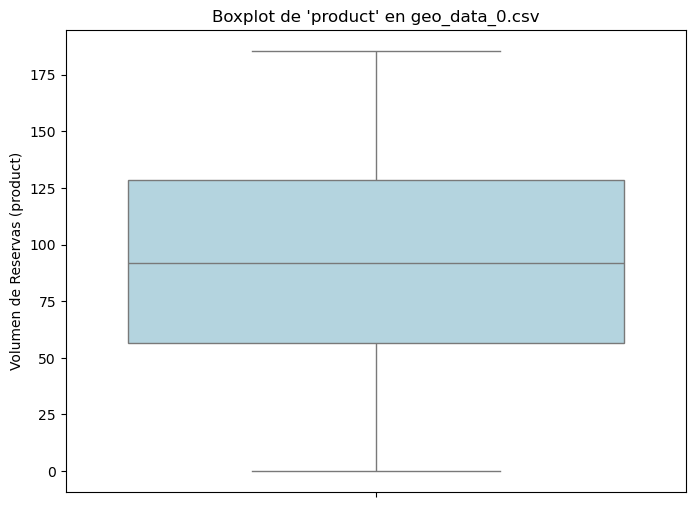

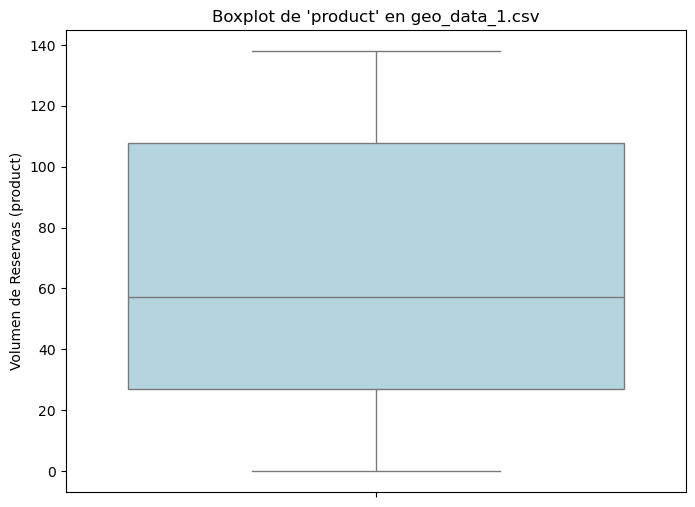

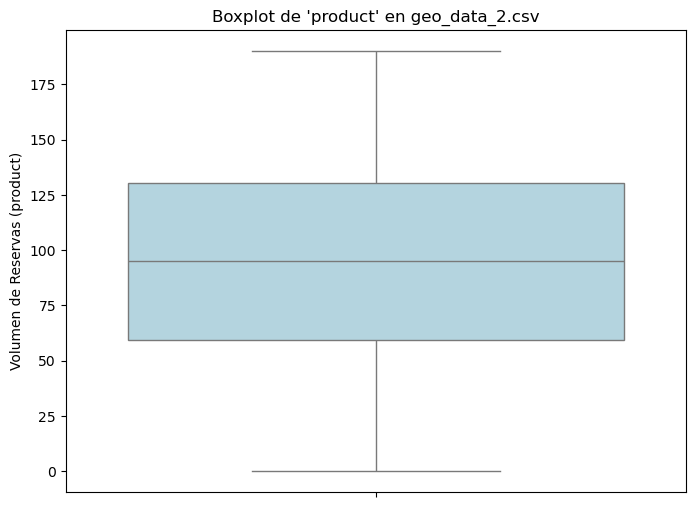

In [15]:
def graficar_boxplot(data, nombre):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data['product'], color='lightblue')
    plt.title(f"Boxplot de 'product' en {nombre}")
    plt.ylabel("Volumen de Reservas (product)")
    plt.show()


# Crear boxplots para cada uno de los conjuntos de datos
graficar_boxplot(data0_clean, "geo_data_0.csv")
graficar_boxplot(data1_clean, "geo_data_1.csv")
graficar_boxplot(data2_clean, "geo_data_2.csv")

Los boxplots muestran que los valores de product en las tres regiones se distribuyen en rangos amplios, sin puntos que sobresalgan como atípicos extremos; en geo_data_0.csv y geo_data_2.csv, los volúmenes de reservas abarcan aproximadamente de 0 a 200, con medianas cercanas a 90-100, mientras que geo_data_1.csv presenta un rango de 0 a 140 y una mediana alrededor de 70. Esto confirma que, aunque cada región tenga su propia variabilidad, no existen valores que se alejen drásticamente del resto, por lo que no se justifica un tratamiento especial de outliers antes de entrenar el modelo.

Ahora podemos proceder al entrenamiento del modelo. 

In [16]:
# Función para entrenar y evaluar el modelo en un dataset dado
def entrenar_evaluar_modelo(data, nombre):
    print(f"Entrenando modelo para {nombre}...")

    # Selección de features y target
    features = data[['f0', 'f1', 'f2']]
    target = data['product']

    # División de datos (75% entrenamiento, 25% validación)
    X_train, X_val, y_train, y_val = train_test_split(
        features, target, test_size=0.25, random_state=42)

    # Entrenamiento del modelo de regresión lineal
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predicción sobre el conjunto de validación
    predicciones = modelo.predict(X_val)

    # Cálculo del RMSE y del volumen medio predicho
    rmse = np.sqrt(mean_squared_error(y_val, predicciones))
    volumen_medio = np.mean(predicciones)

    print(f"Volumen medio de reservas predicho: {volumen_medio:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 50, "\n")

    return modelo, X_train, X_val, y_train, y_val, predicciones


# Aplicamos la función al dataset geo_data_0.csv
modelo0, X_train0, X_val0, y_train0, y_val0, predicciones0 = entrenar_evaluar_modelo(
    data0_clean, "geo_data_0.csv")

Entrenando modelo para geo_data_0.csv...
Volumen medio de reservas predicho: 92.40
RMSE: 37.76
-------------------------------------------------- 



In [17]:
# Aplicamos la función al dataset geo_data_1.csv
modelo1, X_train1, X_val1, y_train1, y_val1, predicciones1 = entrenar_evaluar_modelo(
    data1_clean, "geo_data_1.csv")

Entrenando modelo para geo_data_1.csv...
Volumen medio de reservas predicho: 68.71
RMSE: 0.89
-------------------------------------------------- 



In [18]:
# Aplicamos la función al dataset geo_data_2.csv
modelo2, X_train2, X_val2, y_train2, y_val2, predicciones2 = entrenar_evaluar_modelo(
    data2_clean, "geo_data_2.csv")

Entrenando modelo para geo_data_2.csv...
Volumen medio de reservas predicho: 94.77
RMSE: 40.15
-------------------------------------------------- 



<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor </b> <a class="tocSkip"></a>

¡Muy buen trabajo! Has implementado un enfoque sólido y bien estructurado para la preparación de datos y el entrenamiento del modelo. La segmentación en funciones facilita la organización y reutilización del código, lo que contribuye a la claridad del análisis. Continúa con este enfoque metódico en las siguientes etapas del proyecto.  

</div>


### Discusión de los valores de entrenamiento:
Los modelos entrenados en las tres regiones presentan resultados interesantes y contrastantes. Para geo_data_0.csv y geo_data_2.csv, se observan volúmenes medios predichos cercanos a 92.40 y 94.77, respectivamente, acompañados de RMSE relativamente altos (37.76 y 40.15), lo que indica una mayor variabilidad en las predicciones y, por tanto, en la dispersión de los datos. Por otro lado, el modelo para geo_data_1.csv genera un volumen medio predicho de 68.71 con un RMSE extremadamente bajo (0.89), sugiriendo que los datos en esta región son mucho más homogéneos y que el modelo se ajusta con gran precisión. Esta diferencia en la dispersión y precisión entre las regiones nos invita a analizar no solo la calidad del ajuste del modelo, sino también el potencial económico que cada una ofrece, ya que la precisión del modelo y el rango de los volúmenes predichos son factores clave en la toma de decisiones para la inversión.

### Siguiente etapa y justificación:
El siguiente paso en el proyecto consiste en seleccionar, para cada región, los 200 pozos con las predicciones más altas, lo que permitirá calcular la ganancia potencial basándonos en las variables de negocio (como los ingresos por barril y por unidad de producto) y evaluar si se cumple el mínimo requerido para evitar pérdidas. Además, se implementará un análisis de bootstrapping para obtener intervalos de confianza sobre las ganancias y estimar el riesgo de obtener beneficios negativos. Esta etapa es crucial, ya que combinará la precisión de los modelos con un análisis de rentabilidad y riesgo que fundamentará la elección de la región óptima para la inversión, integrando tanto el desempeño predictivo como los aspectos económicos y financieros del proyecto.

In [19]:
# Función para seleccionar los 200 pozos con las predicciones más altas
def seleccionar_top200(predicciones, X_val):
    # Convertir las predicciones a un DataFrame para su manipulación
    df_val = X_val.copy()
    df_val['pred'] = predicciones
    # Ordenar de mayor a menor y seleccionar los primeros 200
    df_top200 = df_val.sort_values(by='pred', ascending=False).head(200)
    return df_top200


# Para geo_data_0.csv
top200_0 = seleccionar_top200(predicciones0, X_val0)
avg_top200_0 = top200_0['pred'].mean()
sum_top200_0 = top200_0['pred'].sum()
revenue_0 = sum_top200_0 * 4500

print("Resultados para geo_data_0.csv:")
print(f"  Volumen medio de reservas (top200): {avg_top200_0:.2f}")
print(f"  Suma total de reservas (top200): {sum_top200_0:.2f}")
print(f"  Ingreso potencial: {revenue_0:.2f} USD")
print("-" * 50)

# Selección y cálculo para geo_data_1.csv
top200_1 = seleccionar_top200(predicciones1, X_val1)
avg_top200_1 = top200_1['pred'].mean()
sum_top200_1 = top200_1['pred'].sum()
revenue_1 = sum_top200_1 * 4500

print("Resultados para geo_data_1.csv:")
print(f"  Volumen medio de reservas (top200): {avg_top200_1:.2f}")
print(f"  Suma total de reservas (top200): {sum_top200_1:.2f}")
print(f"  Ingreso potencial: {revenue_1:.2f} USD")
print("-" * 50)

# Selección y cálculo para geo_data_2.csv
top200_2 = seleccionar_top200(predicciones2, X_val2)
avg_top200_2 = top200_2['pred'].mean()
sum_top200_2 = top200_2['pred'].sum()
revenue_2 = sum_top200_2 * 4500

print("Resultados para geo_data_2.csv:")
print(f"  Volumen medio de reservas (top200): {avg_top200_2:.2f}")
print(f"  Suma total de reservas (top200): {sum_top200_2:.2f}")
print(f"  Ingreso potencial: {revenue_2:.2f} USD")
print("-" * 50)

Resultados para geo_data_0.csv:
  Volumen medio de reservas (top200): 154.41
  Suma total de reservas (top200): 30881.46
  Ingreso potencial: 138966584.80 USD
--------------------------------------------------
Resultados para geo_data_1.csv:
  Volumen medio de reservas (top200): 138.74
  Suma total de reservas (top200): 27748.75
  Ingreso potencial: 124869381.15 USD
--------------------------------------------------
Resultados para geo_data_2.csv:
  Volumen medio de reservas (top200): 148.64
  Suma total de reservas (top200): 29728.85
  Ingreso potencial: 133779815.14 USD
--------------------------------------------------


Los resultados muestran que la región representada por geo_data_0.csv destaca con el mayor volumen medio de reservas (154.41) y la mayor suma total (30,881.46 unidades), lo que se traduce en un ingreso potencial de aproximadamente 139 millones de USD. En comparación, geo_data_2.csv presenta valores intermedios (148.64 y 29,728.85 unidades, generando cerca de 134 millones de USD), y geo_data_1.csv se queda atrás con un promedio de 138.74 y un total de 27,748.75 unidades, resultando en un ingreso potencial de aproximadamente 125 millones de USD. La multiplicación por 4500 proviene de la regla de negocio establecida: cada unidad de producto, que equivale a mil barriles de reservas, genera un ingreso de 4500 USD. Este factor permite convertir las reservas predichas en un estimado de ingresos, facilitando la comparación de la rentabilidad potencial entre las distintas regiones.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor </b> <a class="tocSkip"></a>

¡Excelente avance! Has realizado un análisis detallado de la selección de pozos y su impacto en la rentabilidad de cada región. La combinación de predicciones del modelo con métricas de negocio fortalece la toma de decisiones y aporta profundidad al proyecto. Sigue adelante con este nivel de claridad y precisión en las siguientes etapas.

</div>


### Análisis de Riesgo mediante Bootstrapping

En este paso aplicaremos la técnica de bootstrapping a los 200 pozos seleccionados de cada región. Generaremos 1000 muestras (con reemplazo) de la lista de predicciones y, para cada muestra, calcularemos el ingreso potencial total (multiplicando la suma de las reservas predichas por 4500 USD, ya que cada unidad de producto equivale a 4500 USD en ingresos). Con esto, obtendremos una distribución de ingresos potenciales que nos permitirá calcular el ingreso promedio, el intervalo de confianza del 95% y estimar el riesgo (la probabilidad de que se obtenga una ganancia negativa). Esta metodología es fundamental para cuantificar la incertidumbre en nuestros pronósticos y fundamentar la toma de decisiones de inversión.


In [20]:
def bootstrapping_analysis(top200_df, num_samples=1000, alpha=0.05):

    revenue_samples = []
    n = len(top200_df)
    # Utilizamos un generador de números aleatorios para reproducibilidad
    rng = np.random.default_rng(seed=12345)

    for _ in range(num_samples):
        # Extraemos una muestra de tamaño n con reemplazo
        sample = top200_df['pred'].sample(n, replace=True, random_state=rng)
        # Calculamos el ingreso potencial de la muestra (suma de reservas * 4500 USD)
        revenue_sample = sample.sum() * 4500
        revenue_samples.append(revenue_sample)

    revenue_samples = np.array(revenue_samples)
    mean_revenue = revenue_samples.mean()

    # Calculamos el intervalo de confianza del 95% utilizando percentiles
    lower_bound = np.percentile(revenue_samples, 100 * (alpha/2))
    upper_bound = np.percentile(revenue_samples, 100 * (1 - alpha/2))
    ci = (lower_bound, upper_bound)

    # Calculamos el riesgo como el porcentaje de muestras con ingreso negativo
    risk = (revenue_samples < 0).mean() * 100

    return mean_revenue, ci, risk, revenue_samples


# Realizar el análisis de bootstrapping para cada región
mean_rev0, ci0, risk0, boot_rev0 = bootstrapping_analysis(top200_0)
mean_rev1, ci1, risk1, boot_rev1 = bootstrapping_analysis(top200_1)
mean_rev2, ci2, risk2, boot_rev2 = bootstrapping_analysis(top200_2)

# Imprimir los resultados de bootstrapping
print("Bootstrapping Results for geo_data_0.csv:")
print(f"  Promedio de ingreso: {mean_rev0:.2f} USD")
print(f"  Intervalo de confianza 95%: ({ci0[0]:.2f}, {ci0[1]:.2f}) USD")
print(f"  Riesgo de pérdidas: {risk0:.2f}%")
print("-" * 50)
print("Bootstrapping Results for geo_data_1.csv:")
print(f"  Promedio de ingreso: {mean_rev1:.2f} USD")
print(f"  Intervalo de confianza 95%: ({ci1[0]:.2f}, {ci1[1]:.2f}) USD")
print(f"  Riesgo de pérdidas: {risk1:.2f}%")
print("-" * 50)
print("Bootstrapping Results for geo_data_2.csv:")
print(f"  Promedio de ingreso: {mean_rev2:.2f} USD")
print(f"  Intervalo de confianza 95%: ({ci2[0]:.2f}, {ci2[1]:.2f}) USD")
print(f"  Riesgo de pérdidas: {risk2:.2f}%")
print("-" * 50)

Bootstrapping Results for geo_data_0.csv:
  Promedio de ingreso: 138968980.99 USD
  Intervalo de confianza 95%: (138179645.75, 139803978.84) USD
  Riesgo de pérdidas: 0.00%
--------------------------------------------------
Bootstrapping Results for geo_data_1.csv:
  Promedio de ingreso: 124869483.52 USD
  Intervalo de confianza 95%: (124836194.93, 124903015.05) USD
  Riesgo de pérdidas: 0.00%
--------------------------------------------------
Bootstrapping Results for geo_data_2.csv:
  Promedio de ingreso: 133779689.92 USD
  Intervalo de confianza 95%: (133132667.80, 134414076.27) USD
  Riesgo de pérdidas: 0.00%
--------------------------------------------------


Los resultados del análisis de bootstrapping muestran una alta estabilidad en las predicciones de ingresos potenciales para cada región, lo que se evidencia en los intervalos de confianza muy estrechos y en la ausencia de riesgo de pérdidas (0.00% en todos los casos). En particular, geo_data_0.csv presenta un ingreso promedio de aproximadamente 139 millones de USD, seguido de geo_data_2.csv con alrededor de 134 millones y geo_data_1.csv con unos 125 millones de USD. Estos hallazgos sugieren que la región correspondiente a geo_data_0.csv no solo ofrece el mayor ingreso potencial, sino que también cuenta con una estimación robusta y confiable.


## Conclusión del proyecto

Durante el desarrollo de este proyecto, se abordó el reto de identificar la región óptima para la inversión en 200 nuevos pozos petroleros para la compañía OilyGiant. En primer lugar, se importaron y preprocesaron tres conjuntos de datos (geo_data_0.csv, geo_data_1.csv y geo_data_2.csv), verificando la integridad de la información y confirmando la ausencia de valores nulos. Posteriormente, se realizaron análisis exploratorios mediante histogramas y boxplots, lo que permitió observar la distribución y detectar la posible presencia de outliers en la variable "product" (volumen de reservas). Con base en estos análisis, se entrenaron modelos de regresión lineal para cada región, obteniendo resultados diferenciados en términos de volumen medio predicho y RMSE; mientras geo_data_1.csv mostró una alta precisión con menor variabilidad, geo_data_0.csv y geo_data_2.csv evidenciaron mayor dispersión en sus predicciones.

A continuación, se seleccionaron los 200 pozos con las predicciones más altas en cada conjunto y se calcularon indicadores clave como el volumen medio, la suma total de reservas y el ingreso potencial, utilizando la premisa de que cada unidad de producto genera 4500 USD. Los resultados mostraron ingresos potenciales de aproximadamente 139 millones de USD para geo_data_0.csv, 134 millones para geo_data_2.csv y 125 millones para geo_data_1.csv. Para robustecer estos hallazgos, se aplicó la técnica de bootstrapping, obteniendo intervalos de confianza estrechos y un riesgo de pérdidas del 0%, lo que indica que, bajo el modelo actual, la inversión en cada región garantiza ingresos positivos.

Con base en estos análisis, se recomienda optar por la región representada por geo_data_0.csv, ya que no solo ofrece el mayor ingreso potencial, sino también una estimación robusta y estable que minimiza el riesgo de pérdidas. Esta recomendación se fundamenta en la integración de los resultados técnicos del modelo, el análisis exploratorio y el estudio de riesgo, asegurando una decisión informada y alineada con los objetivos financieros de la inversión.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor </b> <a class="tocSkip"></a>

Has completado un análisis sólido y bien estructurado, integrando técnicas avanzadas como bootstrapping para evaluar el riesgo y respaldar la toma de decisiones. La conclusión está bien fundamentada y conecta los resultados técnicos con la rentabilidad del negocio, asegurando una recomendación clara y confiable. Excelente trabajo en cada etapa del proyecto.

</div>


#  Comentario general del revisor 

<div class="alert alert-block alert-success"> 
<b>Comentario Final del Revisor</b> <a class="tocSkip"></a>

¡Felicidades Bruno! Tu proyecto **está aprobado.** Has completado un análisis excepcional con un enfoque estructurado y bien fundamentado. A lo largo del proyecto, has demostrado gran habilidad en la manipulación de datos, modelado y evaluación de riesgos, asegurando que las decisiones estén respaldadas por análisis estadísticos y métricas de negocio.  

**Puntos Positivos:**  
    
- Preprocesamiento sólido: Garantizaste la calidad e integridad de los datos antes del modelado.  
- Modelado efectivo: Aplicaste regresión lineal con una correcta validación y evaluación del desempeño.  
- Análisis financiero detallado: Vinculaste los resultados técnicos con métricas de negocio clave.  
- Evaluación de riesgos bien fundamentada: Usaste bootstrapping para generar intervalos de confianza y calcular la probabilidad de pérdidas.  
- Conclusión clara y basada en datos: La selección de la mejor región se justificó con múltiples análisis.  

    
    
**Áreas a Seguir Investigando:**  
    
- Exploración de modelos más complejos: Considerar modelos no lineales, como Random Forest o Gradient Boosting, para mejorar la precisión de las predicciones.  
- Análisis de sensibilidad: Evaluar cómo pequeños cambios en los supuestos pueden impactar la rentabilidad esperada.  
- Optimización de selección de pozos: Explorar estrategias de optimización matemática para mejorar la selección de los 200 pozos más rentables.  
- Evaluación de costos operativos: Incluir costos adicionales en el modelo financiero para obtener una proyección aún más realista de la inversión.  

¡Sigue con este enfoque analítico y sigue explorando nuevas formas de mejorar tus modelos y análisis!  

</div>
